In [1]:
from keras.utils import multi_gpu_model
from keras.models import Model
from keras.layers import Input, Dense


a = Input(shape=(32,))
b = Dense(32)(a)
model = Model(inputs=a, outputs=b)

config = model.get_config()
print(config)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
{'name': 'model_1', 'layers': [{'name': 'input_1', 'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 32), 'dtype': 'float32', 'sparse': False, 'name': 'input_1'}, 'inbound_nodes': []}, {'name': 'dense_1', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'units': 32, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'inbound_nodes': [[['input_1', 0, 0, {}]]]}], 'input_layers': [['input_1', 0, 0]], 'output_layers': [['dense_1', 0, 0]]}


In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
Total params: 1,056
Trainable params: 1,056
Non-trainable params: 0
_________________________________________________________________


# 作業:
    檢查 backend
    檢查 fuzz factor
    設定 Keras 浮點運算為float16

In [3]:
import keras
from keras import backend as K

# 檢查 backend
print(f'The Version of Keras is {keras.__version__}')
print(f'Now Backend is : {K.backend()}')

The Version of Keras is 2.2.4
Now Backend is : tensorflow


In [4]:
# 檢查 fuzz factor
print(f'Now fuzz factor is {K.epsilon()}')

Now fuzz factor is 1e-07


In [5]:
# 查看 Keras 浮點
print(f'float type (before) : {K.floatx()}')

float type (before) : float32


In [6]:
#設定 Keras 浮點運算為float16
K.set_floatx('float16')
print(f'float type (after) : {K.floatx()}')

float type (after) : float16


In [7]:
# 檢查 tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8244189957770295083
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1458231705
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12226051241927530252
physical_device_desc: "device: 0, name: GeForce 940MX, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


/gpu:0 矩阵大小： 0 x 0  时间: 1.1578483581542969
/cpu:0 矩阵大小： 0 x 0  时间: 0.27523183822631836
/gpu:0 矩阵大小： 500 x 500  时间: 0.3402059078216553
/cpu:0 矩阵大小： 500 x 500  时间: 0.3997490406036377
/gpu:0 矩阵大小： 1000 x 1000  时间: 0.4369356632232666
/cpu:0 矩阵大小： 1000 x 1000  时间: 0.6241054534912109
/gpu:0 矩阵大小： 1500 x 1500  时间: 0.5977632999420166
/cpu:0 矩阵大小： 1500 x 1500  时间: 0.9750216007232666
/gpu:0 矩阵大小： 2000 x 2000  时间: 0.7545285224914551
/cpu:0 矩阵大小： 2000 x 2000  时间: 1.301187515258789
/gpu:0 矩阵大小： 2500 x 2500  时间: 0.9498968124389648
/cpu:0 矩阵大小： 2500 x 2500  时间: 1.9200191497802734
/gpu:0 矩阵大小： 3000 x 3000  时间: 1.0864777565002441
/cpu:0 矩阵大小： 3000 x 3000  时间: 2.8415637016296387
/gpu:0 矩阵大小： 3500 x 3500  时间: 1.1713635921478271
/cpu:0 矩阵大小： 3500 x 3500  时间: 3.754835844039917
/gpu:0 矩阵大小： 4000 x 4000  时间: 1.3758771419525146
/cpu:0 矩阵大小： 4000 x 4000  时间: 5.081805944442749
/gpu:0 矩阵大小： 4500 x 4500  时间: 1.52778959274292
/cpu:0 矩阵大小： 4500 x 4500  时间: 6.51775050163269
/gpu:0 矩阵大小： 5000 x 5000  时间: 1.7409737110

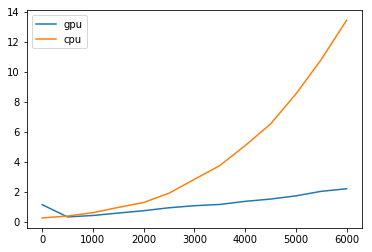

In [8]:
# 對比GPU和CPU的性能差距
import tensorflow as tf
import time

def performanceTest(device_name,size):
    with tf.device(device_name):
        W = tf.random_normal([size, size], name='W')
        X = tf.random_normal([size, size], name='X')
        mul = tf.matmul(W, X, name='mul')
        sum_result = tf.reduce_sum(mul, name='sum')
    
    startTime = time.time()
    tfconfig = tf.ConfigProto(log_device_placement=True)
    with tf.Session(config=tfconfig) as sess:
        result = sess.run(sum_result)
        
    takeTimes = time.time() - startTime
    print(device_name, "矩阵大小：",size,"x",size, " 时间:",takeTimes)
    return takeTimes


gpu_set = [];cpu_set = [];i_set = []
for i in range(0, 6001, 500):
    g = performanceTest("/gpu:0",i)
    c = performanceTest("/cpu:0",i)
    gpu_set.append(g)
    cpu_set.append(c)
    i_set.append(i)
    
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(i_set, gpu_set, label='gpu')
plt.plot(i_set, cpu_set, label='cpu')
plt.legend()